In [ ]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy.stats import distributions as dist

Generate data

In [ ]:
n = 40
x = dist.uniform(0, 30).rvs(n)
theta0, theta1 = 1, 5
y = theta0 + theta1 * x + dist.norm(0,10).rvs(n)

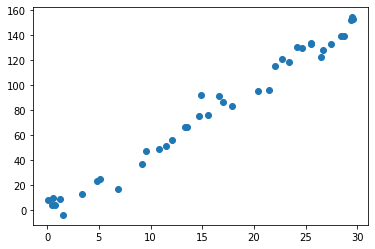

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
with pm.Model() as LinearRegression_in_Class:
    #priors
    theta0 = pm.Normal('theta0', mu = 0, sd = 5)
    theta1 = pm.Normal('theta1', mu = 0, sd = 5)
    e = pm.HalfCauchy('std', 5)
    #line
    μ = theta0 + theta1 * x
    std = e * x
    
    #likehood
    y_obs = pm.Normal('y-lik', mu = μ, sd = std, observed = y)
    trace_model = pm.sample(2000, tune=1000, chains=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [std, theta1, theta0]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35211ebd10>,
      dtype=object)

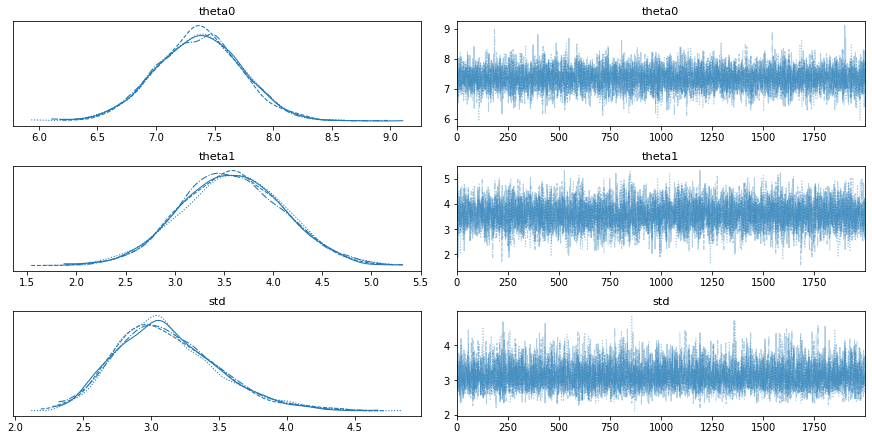

In [ ]:
az.plot_trace(trace_model)

In [ ]:
az.summary(trace_model)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta0,7.362,0.367,6.692,8.057,0.004,0.003,7899.0,5873.0,1.0
theta1,3.580,0.530,2.577,4.573,0.006,0.004,7152.0,5436.0,1.0
std,3.124,0.377,2.446,3.836,0.004,0.003,8184.0,5013.0,1.0


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3507f93e10>,
      dtype=object)

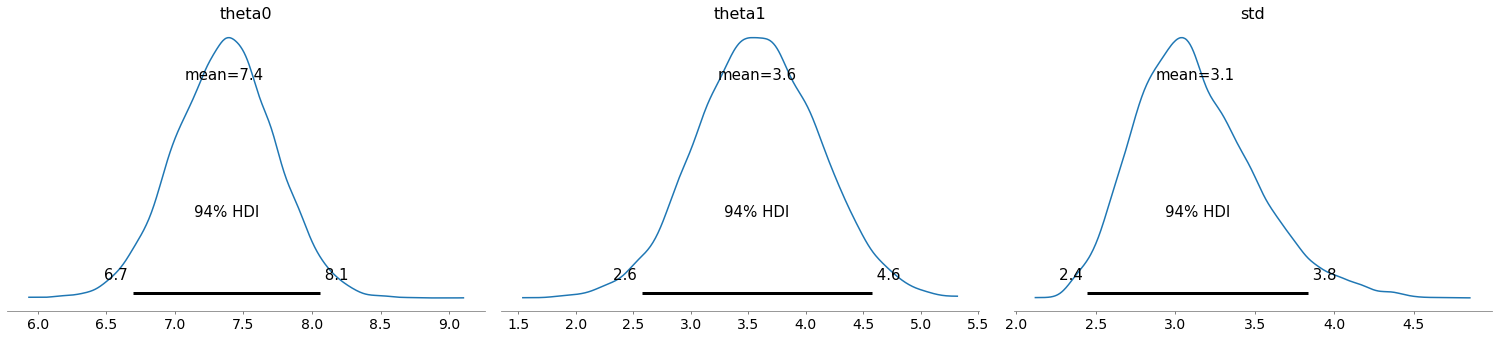

In [ ]:
az.plot_posterior(trace_model)